In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
# import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

In [29]:
# import ppscore as pps

In [30]:
com=pd.read_csv("Company_Data.csv")
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [31]:
# Checking for the information of the data
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [32]:
# Checking for nul values
com.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [33]:
# Checking the correlation
com = com.apply(lambda x: pd.to_numeric(x, errors='coerce')).corr()


In [34]:
com.Sales.unique()

array([ 1.        ,  0.06407873,  0.15195098,  0.26950678,  0.05047098,
       -0.44495073,         nan, -0.23181544, -0.05195524])

In [35]:
com.groupby(['ShelveLoc','Urban','US']).count()

,,,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
ShelveLoc,Urban,US,,,,,,,,


### Label Encoding

In [36]:
label_encoder = preprocessing.LabelEncoder()
com['ShelveLoc']= label_encoder.fit_transform(com['ShelveLoc']) 
com['Urban']= label_encoder.fit_transform(com['Urban'])
com['US']= label_encoder.fit_transform(com['US'])

In [37]:
com['ShelveLoc']=com['ShelveLoc'].astype('category')
com['Urban']=com['Urban'].astype('category')
com['US']=com['US'].astype('category')

In [38]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0,-0.231815,-0.051955,0,0
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0,-0.100239,0.025197,0,0
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,0,-0.004670,-0.056855,0,0
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0,-0.004557,-0.033594,0,0
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,0,-0.042663,-0.106378,0,0


In [39]:
type(com.ShelveLoc)

pandas.core.series.Series

In [40]:

com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Sales to US
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        8 non-null      float64 
 1   CompPrice    8 non-null      float64 
 2   Income       8 non-null      float64 
 3   Advertising  8 non-null      float64 
 4   Population   8 non-null      float64 
 5   Price        8 non-null      float64 
 6   ShelveLoc    11 non-null     category
 7   Age          8 non-null      float64 
 8   Education    8 non-null      float64 
 9   Urban        11 non-null     category
 10  US           11 non-null     category
dtypes: category(3), float64(8)
memory usage: 1.4+ KB


In [41]:
colnames = list(com.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

### Visualization

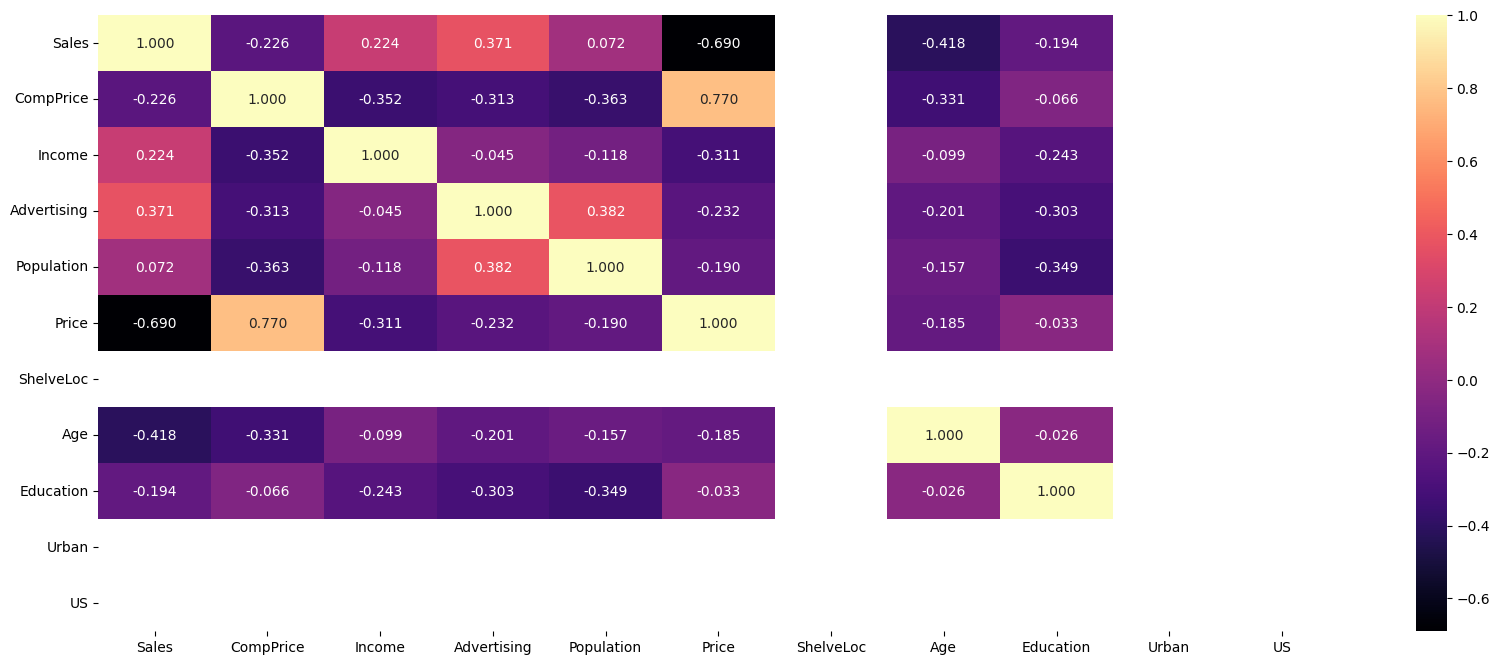

In [42]:
# Heatmap for correlaltion
plt.figure(figsize = (20, 8));
sns.heatmap(com.corr(),cmap='magma', annot=True, fmt='.3f')
plt.show()

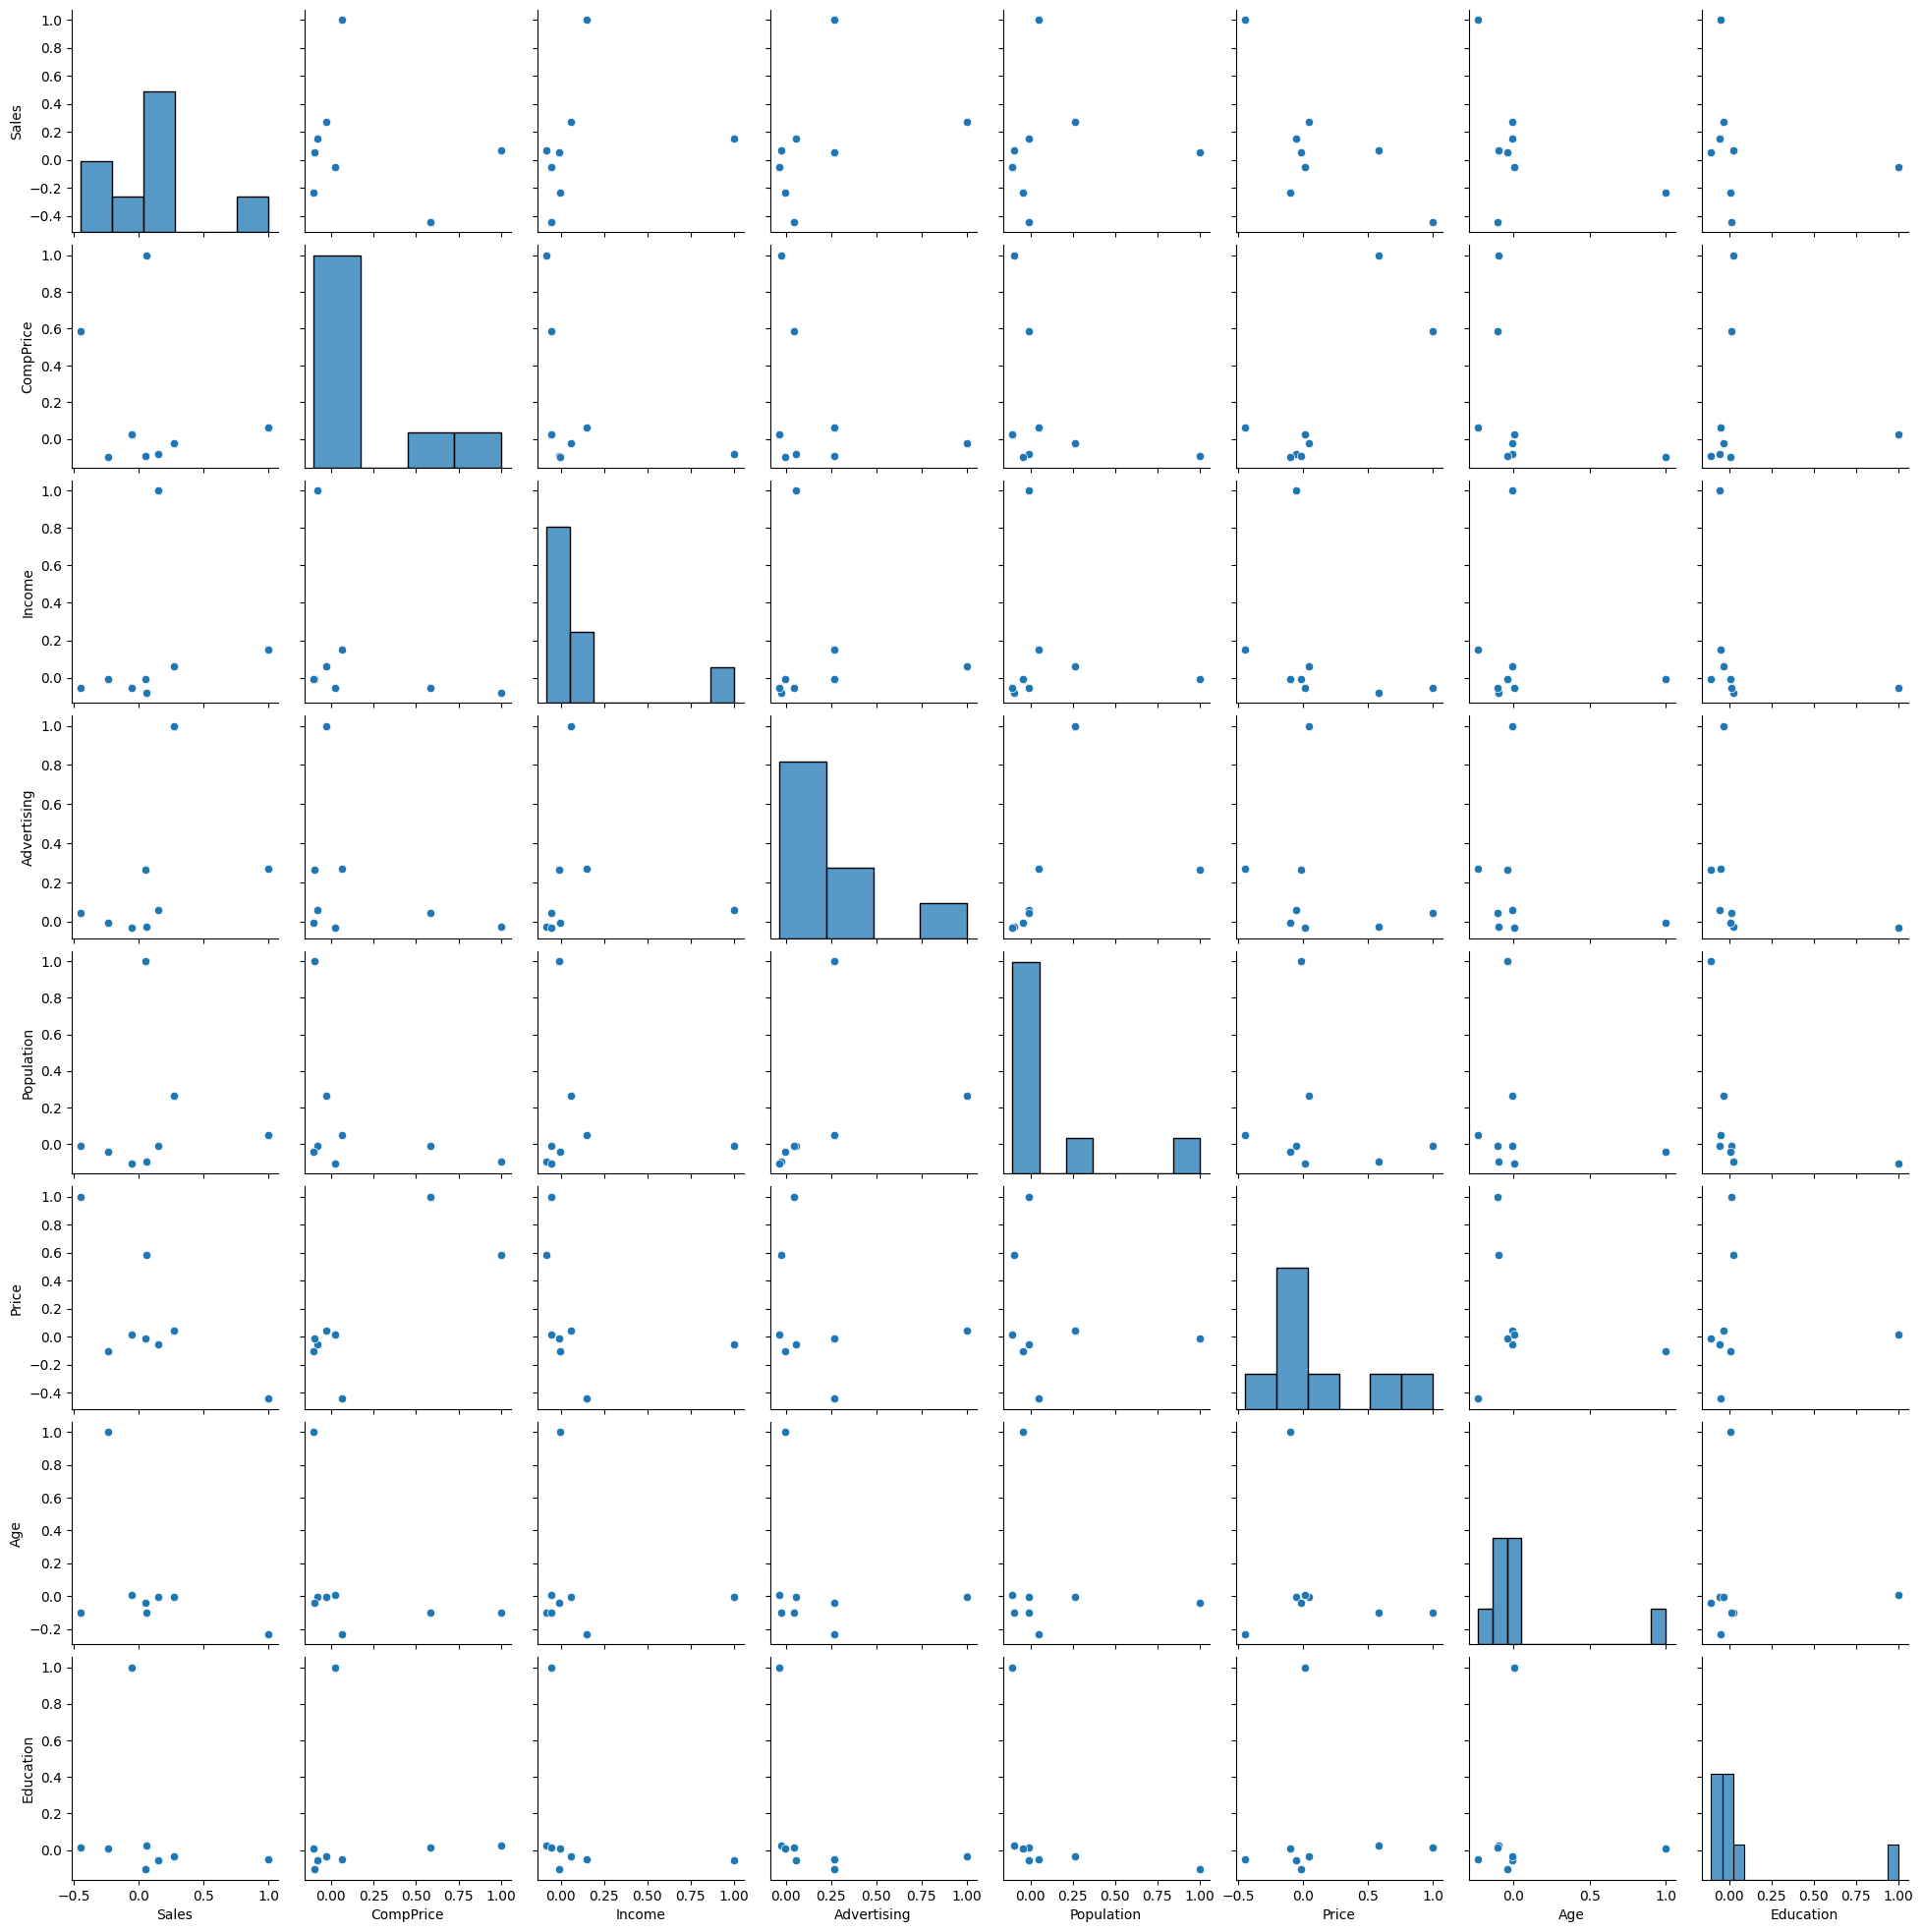

In [43]:
# Pair plot to visualise the data
sns.pairplot(data=com)

<Axes: xlabel='Sales', ylabel='Income'>

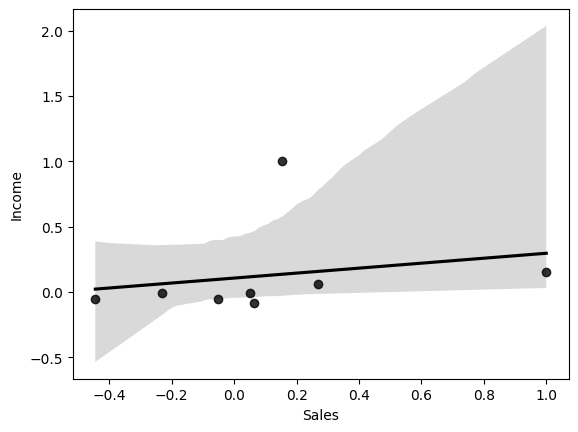

In [44]:
sns.regplot(x='Sales', y='Income', data=com, color='black')


<Axes: xlabel='ShelveLoc'>

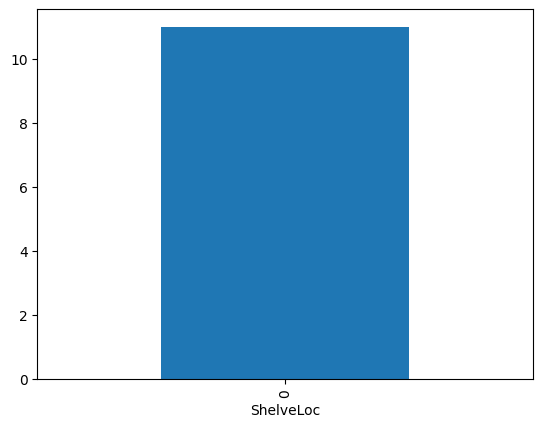

In [45]:
com.ShelveLoc.value_counts(ascending=True).plot(kind='bar')

In [46]:
x=com.drop(['Sales'], axis=1)
y=com[['Sales']]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,0.064079,0.151951,0.269507,0.050471,-0.444951,0,-0.231815,-0.051955,0,0
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0,-0.100239,0.025197,0,0
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,0,-0.004670,-0.056855,0,0
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0,-0.004557,-0.033594,0,0
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,0,-0.042663,-0.106378,0,0


In [23]:
pip install ppscore



  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [2517 lines of output]
      <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\pandas
      copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
      copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
      copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
      copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
      copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
      creating build\lib.win-amd64-cpython-312\pandas\api
      copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\a

### Building Decision Tree Classifier using Entropy Criteria

In [47]:
array = com.values
X = array[:,1:11]
y = array[:,0]
y

array([ 1.        ,  0.06407873,  0.15195098,  0.26950678,  0.05047098,
       -0.44495073,         nan, -0.23181544, -0.05195524,         nan,
               nan])

In [48]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=1)

In [49]:
x=com.iloc[:,0:6]
y=com['ShelveLoc']

In [50]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

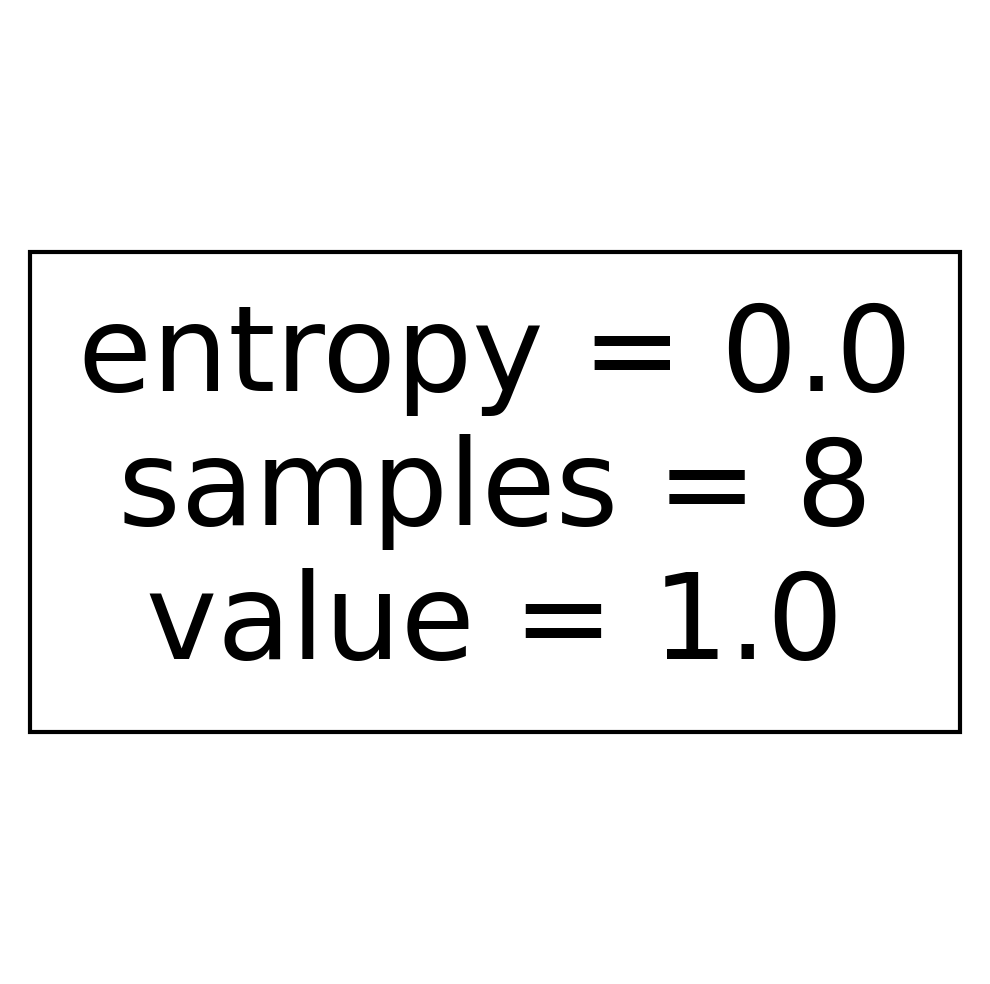

In [52]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [53]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    3
Name: count, dtype: int64

In [54]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0
ShelveLoc,
0,3


In [55]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [56]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [57]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

### Decision Tree Regression

In [58]:
array = com.values
X = array[:,0:3]
y = array[:,3]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [62]:
non_nan_indices = ~np.isnan(y_train)

# Filter X_train and y_train to keep only non-NaN values
X_train_clean = X_train[non_nan_indices]
y_train_clean = y_train[non_nan_indices]

# Create and fit the model
model1 = DecisionTreeRegressor()
model1.fit(X_train_clean, y_train_clean)

DecisionTreeRegressor()

In [66]:
# Checking the accuracy
non_nan_indices = ~np.isnan(X_test).any(axis=1) & ~np.isnan(y_test)

# Filter X_test and y_test to keep only non-NaN values
X_test_clean = X_test[non_nan_indices]
y_test_clean = y_test[non_nan_indices]

# Calculate the score using the cleaned data
score = model1.score(X_test_clean, y_test_clean)

In [67]:
score

-1.4576687084766258